In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def load_data(path, flatten=False):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(path):
        for filename in files:
            filepath = subdir + os.sep + filename
            label = subdir[-1]
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if(flatten):
                img = img.flatten()
            images.append(img)
            labels.append(label)
            
    return np.array(images), np.array(labels)

train_images, train_labels = load_data("mnist_png/training", flatten=True)
test_images, test_labels = load_data("mnist_png/testing", flatten=True)

train_images = train_images / 255.0
test_images = test_images / 255.0

In [2]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, shuffle=True, test_size = 0.2, random_state = 5)

In [3]:
model = Sequential()

model.add(Dense(128, activation = "relu", input_shape = (784,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

optimizer = SGD(lr=0.01)
model.compile(optimizer=optimizer , loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [4]:
print(train_images.shape, train_labels.shape, val_images.shape, val_labels.shape)

history = model.fit(
        train_images, train_labels,
        batch_size=128,
        epochs = 10,
        validation_data = (val_images,val_labels)
    )

# Plot the loss and accuracy curves for training and validation 


(48000, 784) (48000, 10) (12000, 784) (12000, 10)
Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 1.4230 - accuracy: 0.6504 - val_loss: 0.7560 - val_accuracy: 0.8253
Epoch 2/10
375/375 [==============================] - 1s 1ms/step - loss: 0.5869 - accuracy: 0.8508 - val_loss: 0.4718 - val_accuracy: 0.8748
Epoch 3/10
375/375 [==============================] - 1s 1ms/step - loss: 0.4322 - accuracy: 0.8815 - val_loss: 0.3893 - val_accuracy: 0.8936
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3734 - accuracy: 0.8948 - val_loss: 0.3526 - val_accuracy: 0.9014
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3398 - accuracy: 0.9034 - val_loss: 0.3265 - val_accuracy: 0.9087
Epoch 6/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3172 - accuracy: 0.9098 - val_loss: 0.3074 - val_accuracy: 0.9153
Epoch 7/10
375/375 [==============================] - 1s 1ms/step - loss: 0.2991 - accuracy: 0.914

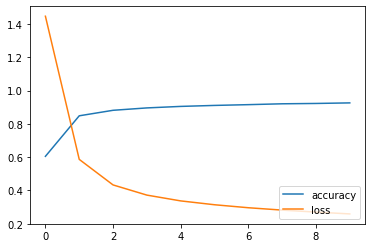

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='lower right')

In [6]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25023353099823
Test accuracy: 0.9286999702453613
